# MLP for classification tasks

For this dataset:

LotArea: Total lot area in square feet.

OverallQual: Overall material and finish quality of the house.

OverallCond: Overall condition of the house.

TotalBsmtSF: Total square footage of the basement.

FullBath: Number of full bathrooms.

HalfBath: Number of half bathrooms (a half bath usually has only a toilet and sink).

BedroomAbvGr: Number of bedrooms above ground level.

TotRmsAbvGrd: Total number of rooms above ground level (excluding bathrooms).

Fireplaces: Number of fireplaces in the house.

GarageArea: Square footage of the garage.

AboveMedianPrice: A binary feature (likely encoded as 0 or 1) indicating whether the price of the house is above the median value.

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [23]:
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

In [24]:
X

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460
1456,13175,6,6,1542,2,0,3,7,2,500
1457,9042,7,9,1152,2,0,4,9,2,252
1458,9717,5,6,1078,1,0,2,5,0,240


In [25]:
y

,AboveMedianPrice
0,1
1,1
2,1
3,0
4,1
...,...
1455,1
1456,1
1457,1
1458,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [28]:
df_Normalized=pd.DataFrame(X_scaled)
df_Normalized.head()

,0,1,2,3,4,5,6,7,8,9
0,0.033420,0.666667,0.500,0.140098,0.666667,0.5,0.375,0.500000,0.000000,0.386460
1,0.038795,0.555556,0.875,0.206547,0.666667,0.0,0.375,0.333333,0.333333,0.324401
2,0.046507,0.666667,0.500,0.150573,0.666667,0.5,0.375,0.333333,0.333333,0.428773
3,0.038561,0.666667,0.500,0.123732,0.333333,0.0,0.375,0.416667,0.333333,0.452750
4,0.060576,0.777778,0.500,0.187398,0.666667,0.5,0.500,0.583333,0.333333,0.589563


In [29]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% validation + test sets
X_train, X_val, Y_train, Y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1)

# Split the 30% validation + test set into 50% validation and 50% test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_val, Y_val, test_size=0.5, random_state=1)

# So you end up with a 70 / 15 / 15 split.

In [30]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_val shape: {Y_val.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (1022, 10)
X_val shape: (219, 10)
X_test shape: (219, 10)
Y_train shape: (1022,)
Y_val shape: (219,)
Y_test shape: (219,)


# Build the NN (Using Keras)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([

    # Input Later
    Input(shape=(10,)),

    # Two Hidden Layers with ReLU activation
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid'),
])

We have to configure the model by

Telling it what algorithm you want to use to do the optimization (we'll use adam)

Telling it what loss function to use (for binary classification, we will use binary cross entropy)

Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well

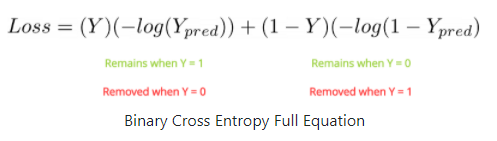

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training on the data**:

 The function is called **'fit'** as we are fitting the parameters to the data.

  We specify:
- what data we are training on, which is **X_train and Y_train**
- the size of our **mini-batch**
- how long we want to train it for (**epochs**)
- what our **validation data** is so that the model will tell us how we are doing on the validation data at each point.

This function will output **a history**, which we save under the variable hist.

In [33]:
history = model.fit(X_train, Y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_data = (X_val, Y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5308 - loss: 0.6727 - val_accuracy: 0.7032 - val_loss: 0.6069
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7702 - loss: 0.5931 - val_accuracy: 0.8584 - val_loss: 0.5089
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7991 - loss: 0.5161 - val_accuracy: 0.8584 - val_loss: 0.4269
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8473 - loss: 0.4201 - val_accuracy: 0.8539 - val_loss: 0.3730
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8404 - loss: 0.3903 - val_accuracy: 0.8676 - val_loss: 0.3500
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3774 - val_accuracy: 0.8813 - val_loss: 0.3305
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3695 - val_accuracy: 0.8858 - val_loss: 0.3178
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8633 - loss: 0.3250 - val_accuracy: 0.8813 - val_loss

Evaluating our data on the test set:

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9216 - loss: 0.1819 
Test accuracy: 0.9086757898330688


# Visualizing Loss and Accuracy

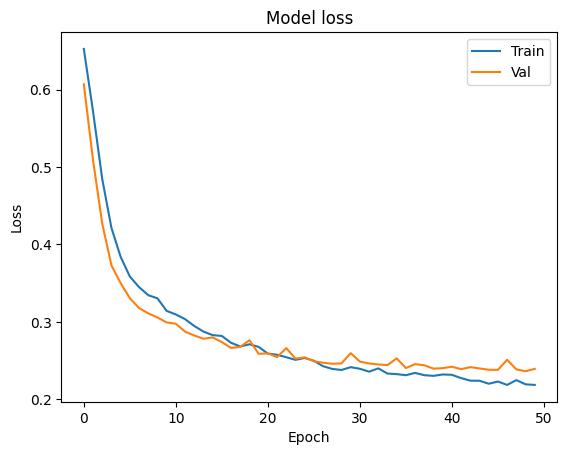

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

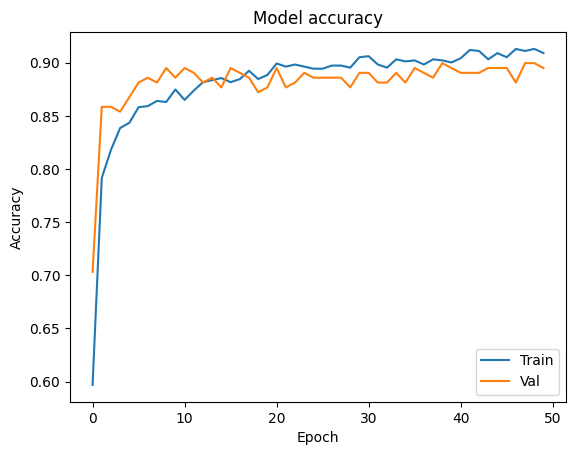

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### TRY again with more complex Model

In [37]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape = (10, )),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7038 - loss: 0.5623 - val_accuracy: 0.8630 - val_loss: 0.3580
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8429 - loss: 0.3678 - val_accuracy: 0.8813 - val_loss: 0.3109
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8657 - loss: 0.3422 - val_accuracy: 0.8721 - val_loss: 0.2994
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8744 - loss: 0.3172 - val_accuracy: 0.8813 - val_loss: 0.2811
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8804 - loss: 0.2825 - val_accuracy: 0.8721 - val_loss: 0.3036
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8816 - loss: 0.2627 - val_accuracy: 0.8904 - val_loss: 0.2508
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.2538 - val_accuracy: 0.9087 - val_loss: 0.2606
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9073 - loss: 0.2440 - val_accuracy: 0.8950 - val_loss: 0.2693
Ep

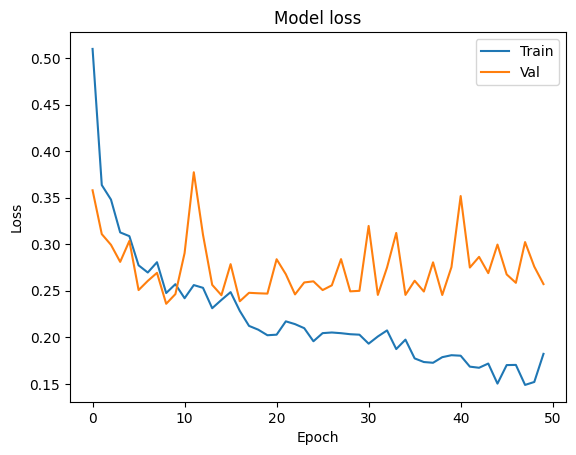

In [38]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

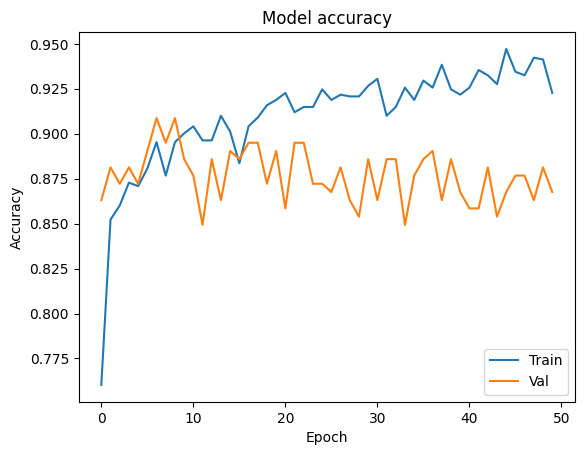

In [39]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# **Recommendations to address this overfitting:**

**1-Early Stopping:** Implement early stopping, halting training around epoch  when validation loss is at its minimum.

**2-Regularization:** Introduce or increase regularization techniques such as L1/L2 regularization, dropout, or batch normalization.

**3-Data Augmentation:** Enhance the diversity of the training set through appropriate data augmentation techniques.

**4-Model Complexity:** Consider simplifying the model architecture if it's too complex for the dataset size.

**5-Cross-Validation:** Implement k-fold cross-validation to ensure this isn't a quirk of a particular data split.

**6-Learning Rate Schedule:** Implement a learning rate decay schedule to fine-tune the model's learning in later epochs.

To address the overfitting we see in Model 2, we'll incorporate **L2 regularization** and **dropout** in our third model here (Model 3).

In [41]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01), input_shape = (10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5325 - loss: 21.1132 - val_accuracy: 0.8630 - val_loss: 3.8766
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8290 - loss: 2.4893 - val_accuracy: 0.8584 - val_loss: 0.6942
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8394 - loss: 0.6535 - val_accuracy: 0.8858 - val_loss: 0.4892
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8776 - loss: 0.5018 - val_accuracy: 0.8950 - val_loss: 0.4703
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8724 - loss: 0.5067 - val_accuracy: 0.8721 - val_loss: 0.5020
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8510 - loss: 0.5222 - val_accuracy: 0.8721 - val_loss: 0.4692
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8730 - loss: 0.4885 - val_accuracy: 0.8767 - val_loss: 0.4531
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8733 - loss: 0.4774 - val_accuracy: 0.8447 - val_

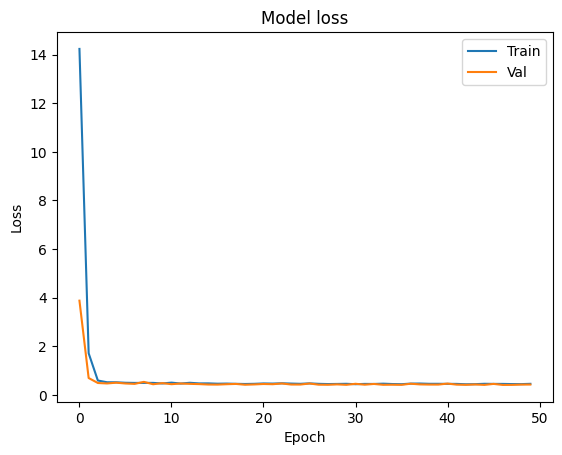

In [43]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

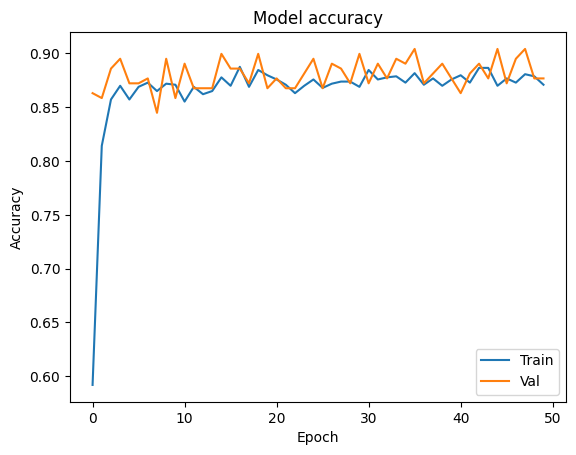

In [44]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!